# Image Classification Using cifar 10 dataset(2D-CNN)

In [2]:
!pip install mlxtend==0.17.2
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
     |████████████████████████████████| 380.8MB 26kB/s 
     |████████████████████████████████| 450kB 40.4MB/s 
     |████████████████████████████████| 3.8MB 49.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successful

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Convolution2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### Download Cifar-10 dataset


In [0]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train = x_train/255
x_test = x_test/255

#### 50000 images, 32x32 pixels, each has 3 depths

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

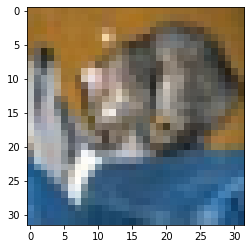

In [9]:
plt.imshow(x_test[0])

#### Build CNN Model

In [0]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',input_shape= [32, 32, 3]))
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation='softmax'))



In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 221s 4ms/sample - loss: 1.3638 - sparse_categorical_accuracy: 0.5114 - val_loss: 1.0698 - val_sparse_categorical_accuracy: 0.6196
Epoch 2/10
50000/50000 [==============================] - 226s 5ms/sample - loss: 1.0543 - sparse_categorical_accuracy: 0.6275 - val_loss: 0.9824 - val_sparse_categorical_accuracy: 0.6482
Epoch 3/10
50000/50000 [==============================] - 225s 4ms/sample - loss: 0.9396 - sparse_categorical_accuracy: 0.6680 - val_loss: 1.0093 - val_sparse_categorical_accuracy: 0.6389
Epoch 4/10
50000/50000 [==============================] - 224s 4ms/sample - loss: 0.8544 - sparse_categorical_accuracy: 0.6961 - val_loss: 0.9283 - val_sparse_categorical_accuracy: 0.6723
Epoch 5/10
50000/50000 [==============================] - 224s 4ms/sample - loss: 0.7808 - sparse_categorical_accuracy: 0.7242 - val_loss: 0.9056 - val_sparse_categorical_accuracy: 0.6836
Epoch 6/10